In [3]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../../scripts/")
import matplotlib.pyplot as plt
import numpy as np

from WH_prediction import *

In [6]:
evo_rates = {
    "env": {"rev": 4.359e-5, "non_rev": 6.734e-6},
    "pol": {"rev": 2.500e-5, "non_rev": 2.946e-6},
    "gag": {"rev": 3.562e-5, "non_rev": 3.739e-6}
}
colors = ["C0","C1","C2"]
regions = ["env", "pol", "gag"]
fontsize = 16
figsize = (14, 10)

# Hamming distance to intial sequence

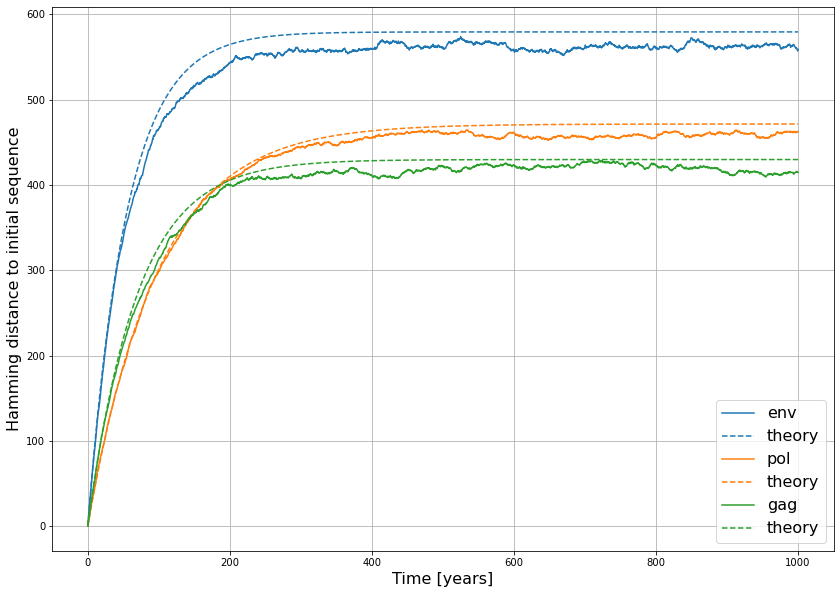

In [21]:
nb_simulation = 10
simulation_time = 365000  # in days
dt = 10
time = np.arange(0, simulation_time+1, dt)
sampling_time = 10 * dt
sequence_length = 2500


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    rate_rev = evo_rates[region]["rev"]
    rate_non_rev = evo_rates[region]["non_rev"]

    # True is consensus, False is non consensus
    x_0 = initialize_fixed_point(sequence_length, rate_rev, rate_non_rev)
    sequences = run_simulation_group(x_0, simulation_time, dt, rate_rev, rate_non_rev, sampling_time, nb_simulation)
    distance_initial = distance_to_initial(sequences)
    mean_distance_initial = np.mean(distance_initial, axis=-1)
    
    x = time[::10] / 365
    saturation = 2 * rate_rev * rate_non_rev * len(x_0) / (rate_rev + rate_non_rev)**2
    tau = 1 / (rate_rev + rate_non_rev)
    theory = saturation * (1 - np.exp(-time / tau))

    plt.plot(x, mean_distance_initial, label=f"{region}", color=colors[ii])
    plt.plot(time / 365, theory, '--', color=colors[ii], label="theory")
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to initial sequence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()


# Same plot in log-log

<ipython-input-13-db51d59a1a55>:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 400])


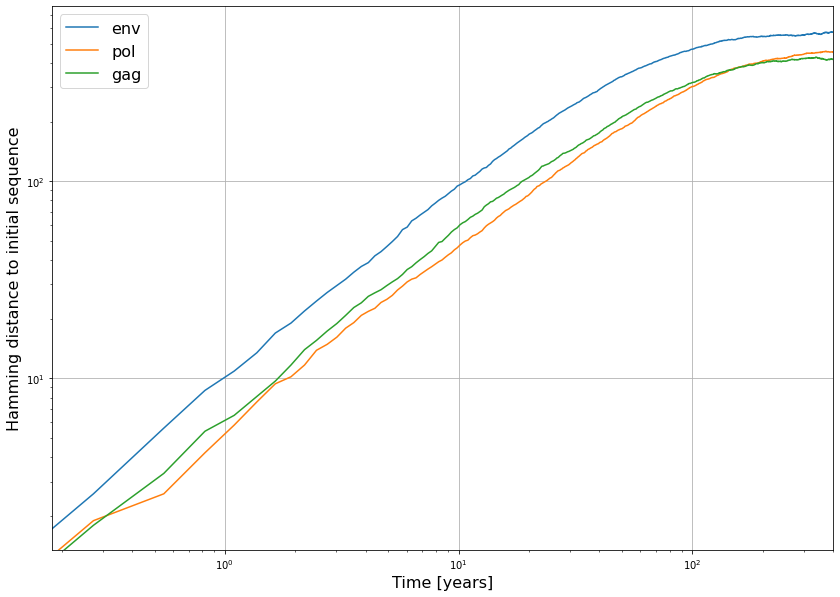

In [13]:
# Exponential behaviour as expected


plt.figure(figsize=figsize)
for ii, region in enumerate(regions):
    rate_rev = evo_rates[region]["rev"]
    rate_non_rev = evo_rates[region]["non_rev"]

    # True is consensus, False is non consensus
    x_0 = initialize_fixed_point(sequence_length, rate_rev, rate_non_rev)
    sequences = run_simulation_group(x_0, simulation_time, dt, rate_rev, rate_non_rev, sampling_time, nb_simulation)
    distance_initial = distance_to_initial(sequences)
    mean_distance_initial = np.mean(distance_initial, axis=-1)
    
    x = time[::10] / 365

    plt.plot(x, mean_distance_initial, label=f"{region}", color=colors[ii])
    
plt.xlabel("Time [years]", fontsize=fontsize)
plt.ylabel("Hamming distance to initial sequence", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xscale("log")
plt.yscale("log")
plt.xlim([0, 400])
plt.grid()
plt.show()
